# Distribution of pairwise distances

In [1]:
import os
import warnings
warnings.simplefilter(action='ignore')
# change working directory
os.chdir('/home/yuke/PythonProject/DrugEmbedding/')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_sp = pd.read_csv('./data/fda_drugs/drugs_sp_all.csv', index_col=0)

In [4]:
df_sp.shape

(1836025, 3)

In [5]:
df_sp.head()

,drug_target,drug_comparison,sp
0,promethazine,promethazine,0
1,promethazine,promethazine,10
2,promethazine,cilostazol,10
3,promethazine,emtricitabine,10
4,promethazine,imiquimod,8


In [8]:
df_sp['drug_target'].unique().shape

(1055,)

In [7]:
df_sp.groupby('sp').count()

,drug_target,drug_comparison
sp,,
0,1355,1355
2,6596,6596
4,14258,14258
6,31896,31896
8,133868,133868
10,1648052,1648052


# % Lorentz improvment

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
dimz = [4, 8, 32, 64]
lor_lvl1 = [0.770, 0.777, 0.794, 0.795]
euc_lvl1 = [0.695, 0.712, 0.770, 0.766]
lor_lvl2 = [0.639, 0.68, 0.69, 0.688]
euc_lvl2 = [0.619, 0.656, 0.682, 0.686]

In [22]:
diff_lvl1 = np.array(lor_lvl1) - np.array(euc_lvl1)
diff_lvl2 = np.array(lor_lvl2) - np.array(euc_lvl2)

In [23]:
perc_lvl1 = np.array(lor_lvl1)/np.array(euc_lvl1) - 1
perc_lvl2 = np.array(lor_lvl2)/np.array(euc_lvl2) - 1

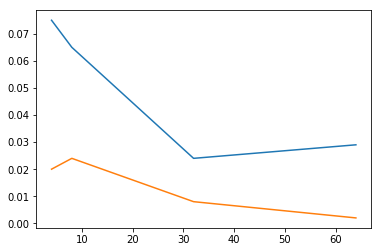

In [27]:
fig, ax = plt.subplots()
line1, = ax.plot(dimz, diff_lvl1)
line1, = ax.plot(dimz, diff_lvl2)

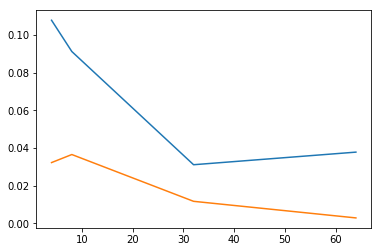

In [28]:
fig, ax = plt.subplots()
line1, = ax.plot(dimz, perc_lvl1)
line2, = ax.plot(dimz, perc_lvl2)

# Learning Task Comparison

In [3]:
atc_lvl = ['Anatomical (L1)', 'Therapeutic (L2)', 'Pharmacological (L3)', 'Chemical (L4)','Molecule (L5)']
fda_atc_only = [0.6981, 0.4292, 0.2686, 0.1512, 0] #exp_data_003: 1600 
#fda_vae_atc = [0.1810, 0.1059, 0.0816, 0.0984, 0] #exp_data_002: 1000
vae_only = [0.1725, 0.1045, 0.094, 0.1442, 0.857]
kdd_010 = [0.7951, 0.6876, 0.7126, 0.5352, 0.9096]

In [4]:
df_task = pd.DataFrame({'SMILES':vae_only, 'ATC':fda_atc_only, 'ATC_and_SMILES':kdd_010}, atc_lvl)

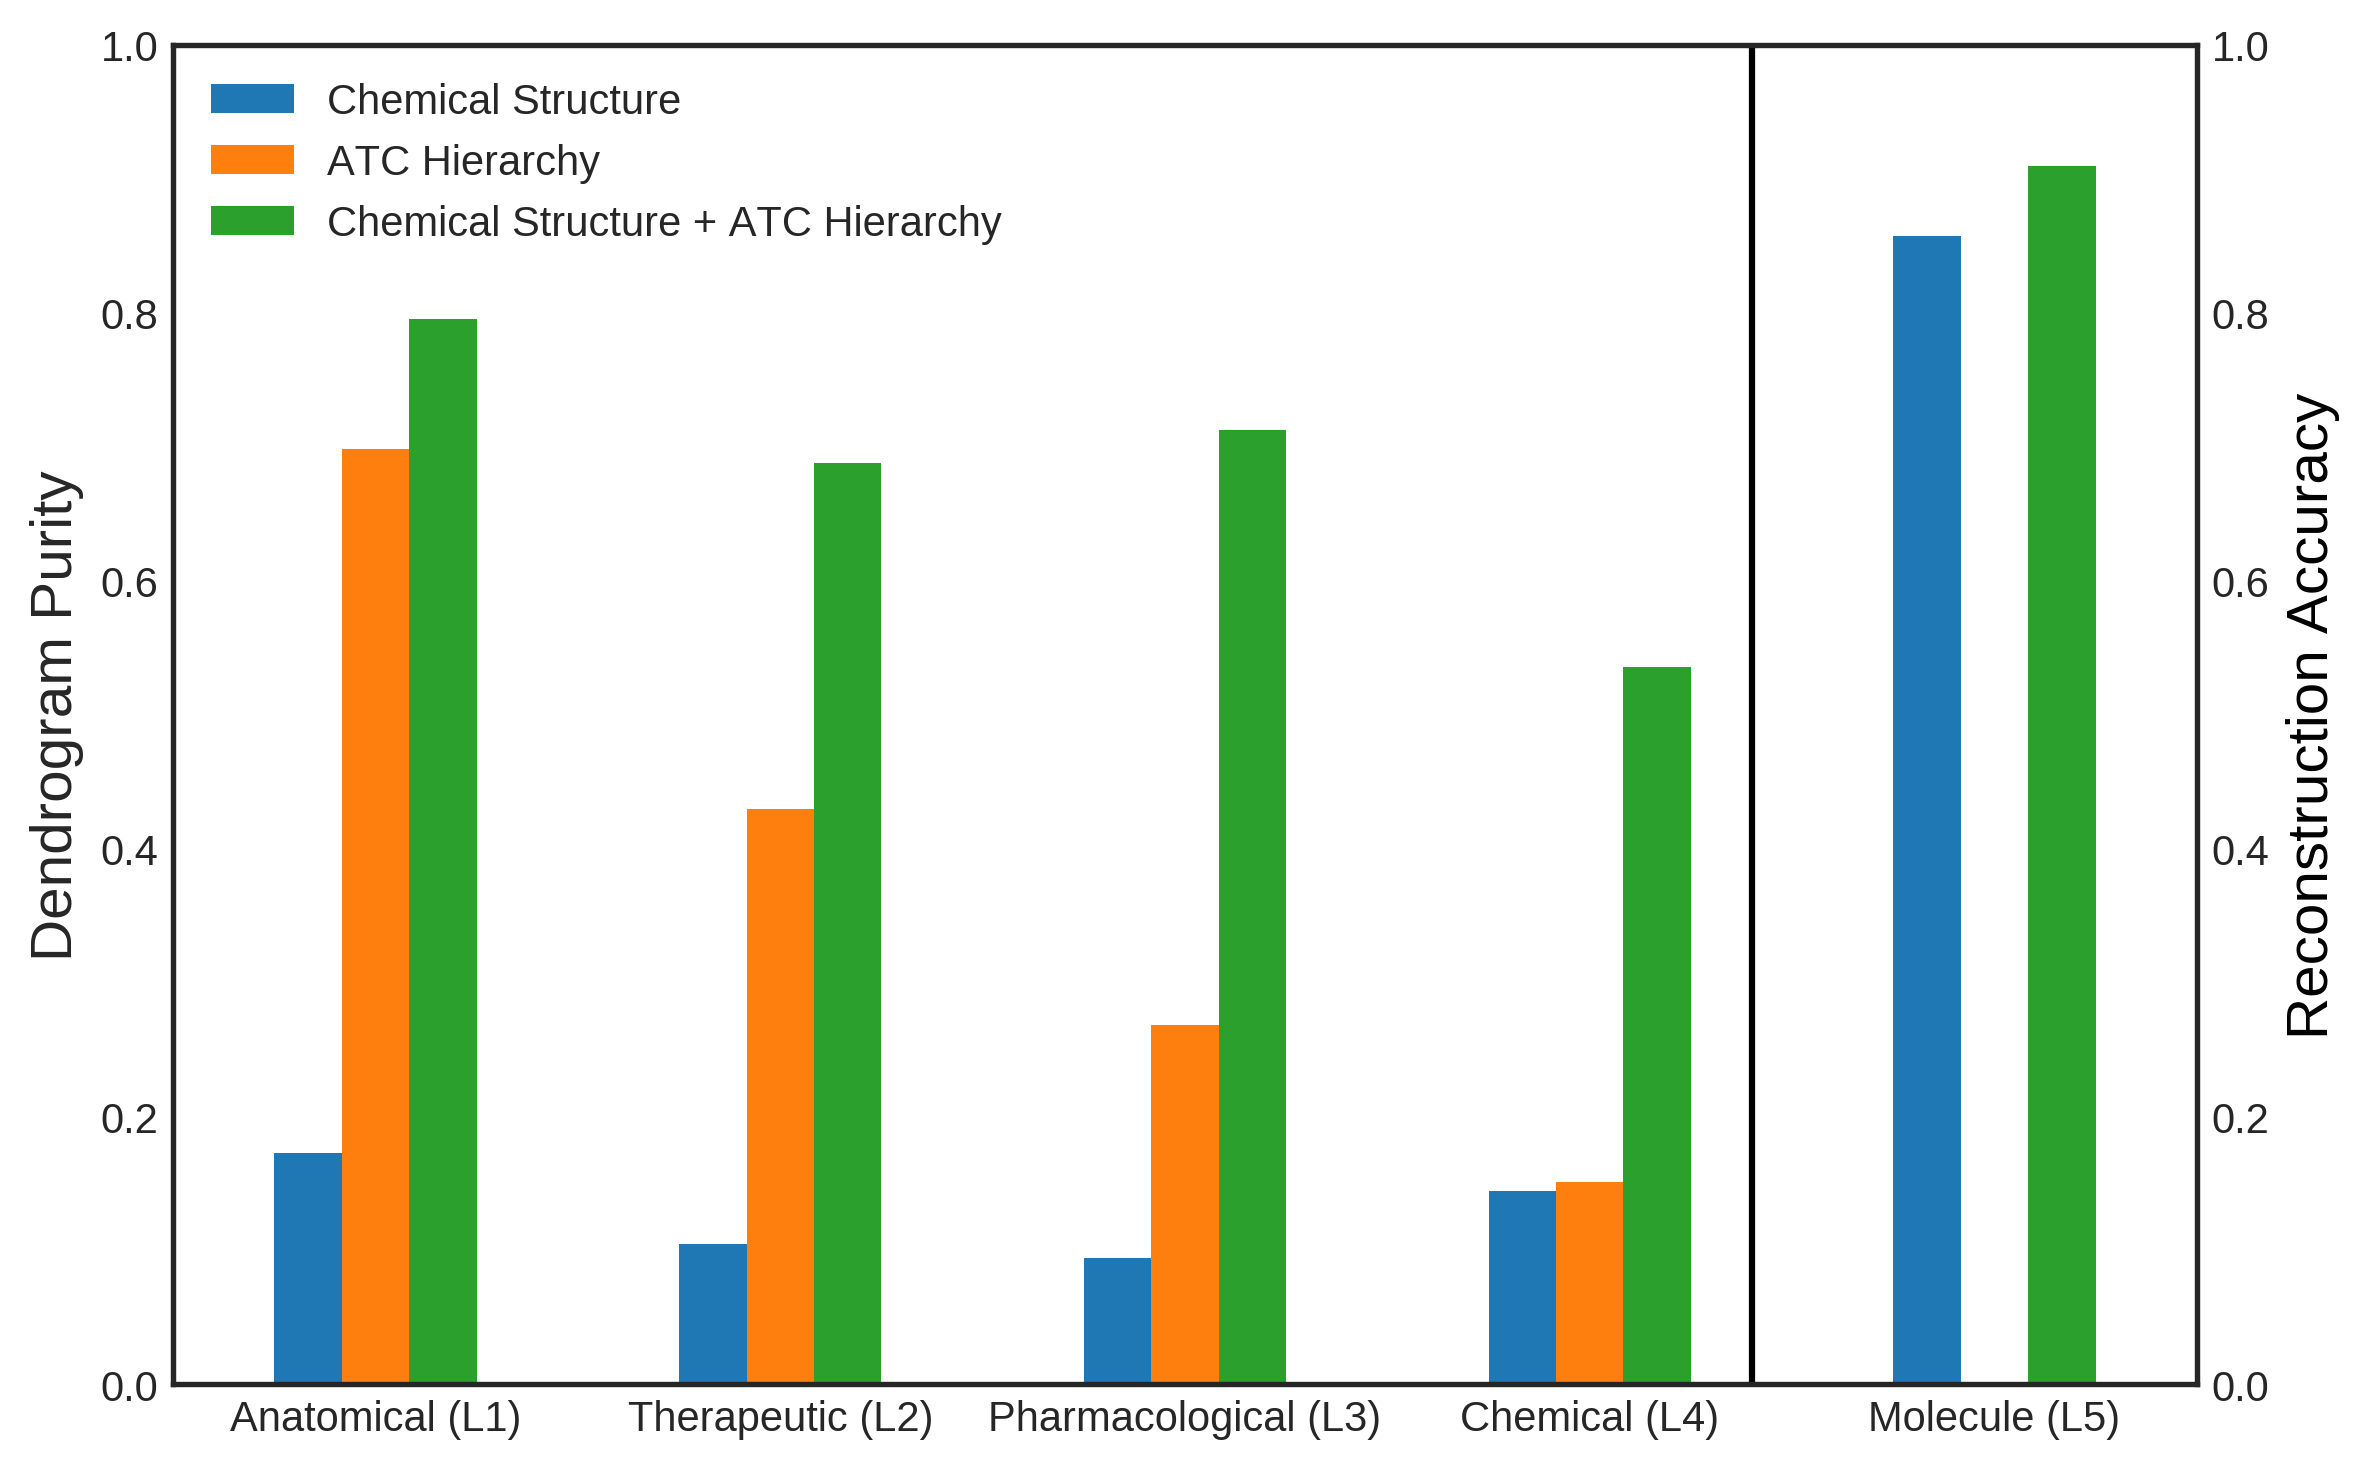

In [5]:
plt.style.use('seaborn-white')

fig1, ax1 = plt.subplots(figsize=(8,5), dpi=300)
df_task.plot.bar(ax=ax1)
ax1.set_xticklabels(labels=atc_lvl, rotation=0)
ax1.set_ylim(0,1)
ax1.set_ylabel('Dendrogram Purity', fontsize=14)
ax1.legend(['Chemical Structure', 'ATC Hierarchy', 'Chemical Structure + ATC Hierarchy'])
ax1.grid(False)

# secondary axis
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim(0,1)
ax2.set_ylabel('Reconstruction Accuracy', fontsize=14, color='k')  # we already handled the x-label with ax1
ax2.grid(False)

fig1.tight_layout()  # otherwise the right y-label is slightly clipped

plt.axvline(x=3.4, color='k', lw=1.5)
plt.show()

In [20]:
atc_lvl = ['L1 (Anatomical)', 'L2 (Therapeutic)', 'L3 (Pharmacological)', 'L4 (Chemical)']
dp_fda_atc_only = [0.6981, 0.4292, 0.2686, 0.1512] #exp_data_003: 1600 
dp_vae_only = [0.1725, 0.1045, 0.094, 0.1442]
dp_kdd_010 = [0.7951, 0.6876, 0.7126, 0.5352]
df_dp = pd.DataFrame({'SMILES':dp_vae_only, 'ATC':dp_fda_atc_only, 'ATC_and_SMILES':dp_kdd_010}, atc_lvl)

mol_lvl = ['Molecular']
ra_fda_atc_only = [0]
ra_vae_only = [0.857]
ra_kdd_010 = [0.9096]
df_ra = pd.DataFrame({'SMILES':ra_vae_only, 'ATC':ra_fda_atc_only, 'ATC_and_SMILES':ra_kdd_010}, mol_lvl)

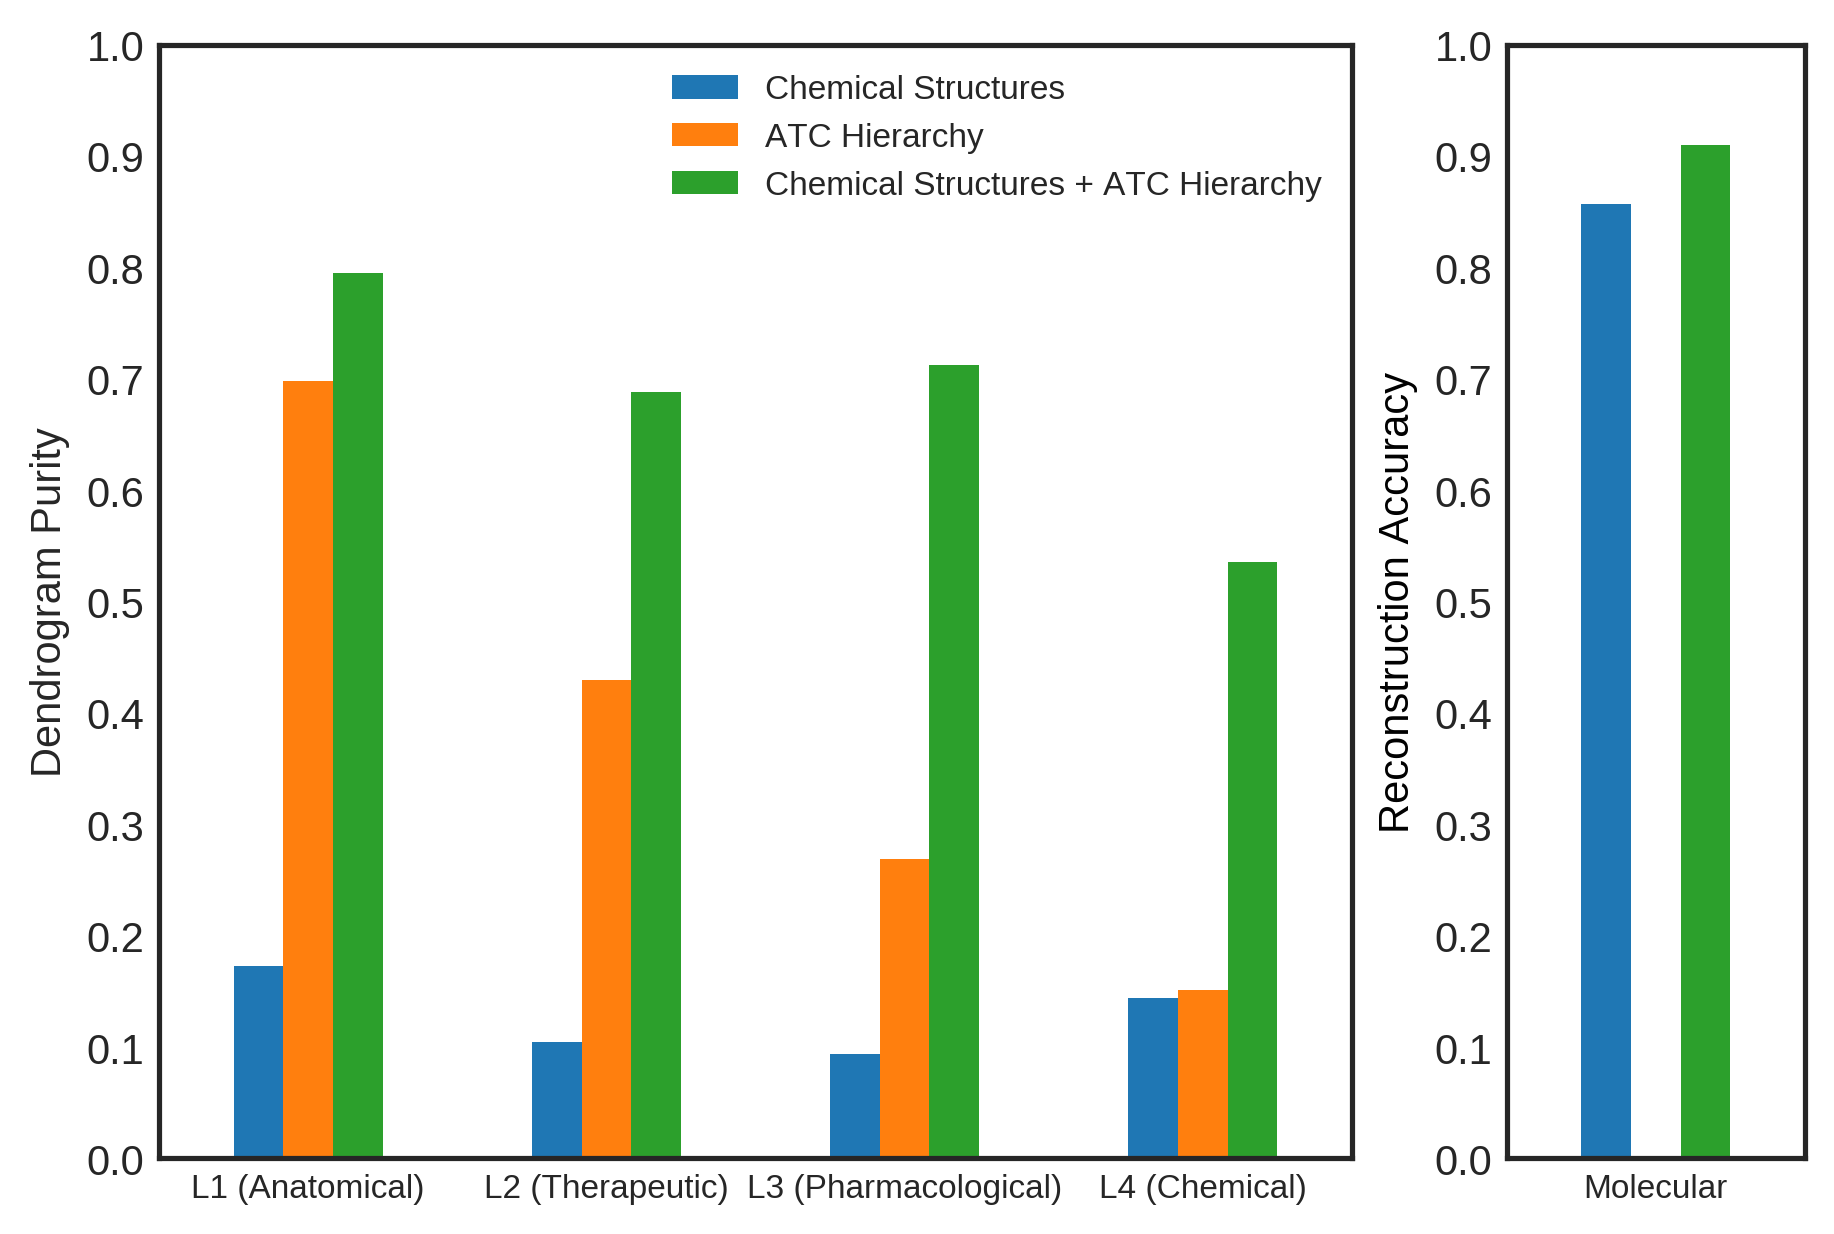

In [21]:
fig3 = plt.figure(constrained_layout=True, dpi=300)
gs = fig3.add_gridspec(80, 50)
f3_ax1 = fig3.add_subplot(gs[:, :40])
df_dp.plot.bar(ax=f3_ax1)
f3_ax1.set_xticklabels(labels=atc_lvl, rotation=0, fontsize=8)
f3_ax1.set_ylabel('Dendrogram Purity', fontsize=10)
f3_ax1.set_yticks(np.arange(0, 1.1, step=0.1))
f3_ax1.legend(['Chemical Structures', 'ATC Hierarchy', 'Chemical Structures + ATC Hierarchy'], fontsize=8)


f3_ax2 = fig3.add_subplot(gs[:, 40:])
df_ra.plot.bar(ax=f3_ax2)
f3_ax2.set_xticklabels(labels=mol_lvl, rotation=0, fontsize=8)
f3_ax2.set_yticks(np.arange(0, 1.1, step=0.1))
f3_ax2.set_ylabel('Reconstruction Accuracy', fontsize=10, color='k')  # we already handled the x-label with ax1
f3_ax2.get_legend().remove()
fig3.tight_layout()

plt.show()

In [11]:
atc_lvl = ['Level 1', 'Level 2', 'Level 3', 'Level 4']
dp_fda_atc_only = [0.6981, 0.4292, 0.2686, 0.1512] #exp_data_003: 1600 
dp_vae_only = [0.1725, 0.1045, 0.094, 0.1442]
dp_kdd_010 = [0.7951, 0.6876, 0.7126, 0.5352]
df_dp = pd.DataFrame({'SMILES':dp_vae_only, 'ATC':dp_fda_atc_only, 'ATC_and_SMILES':dp_kdd_010}, atc_lvl)

#mol_lvl = ['Chemical Structures']
ra_fda_atc_only = [0]
ra_vae_only = [0.857]
ra_kdd_010 = [0.9096]
df_ra = pd.DataFrame({'SMILES':ra_vae_only, 'ATC':ra_fda_atc_only, 'ATC_and_SMILES':ra_kdd_010}, mol_lvl)

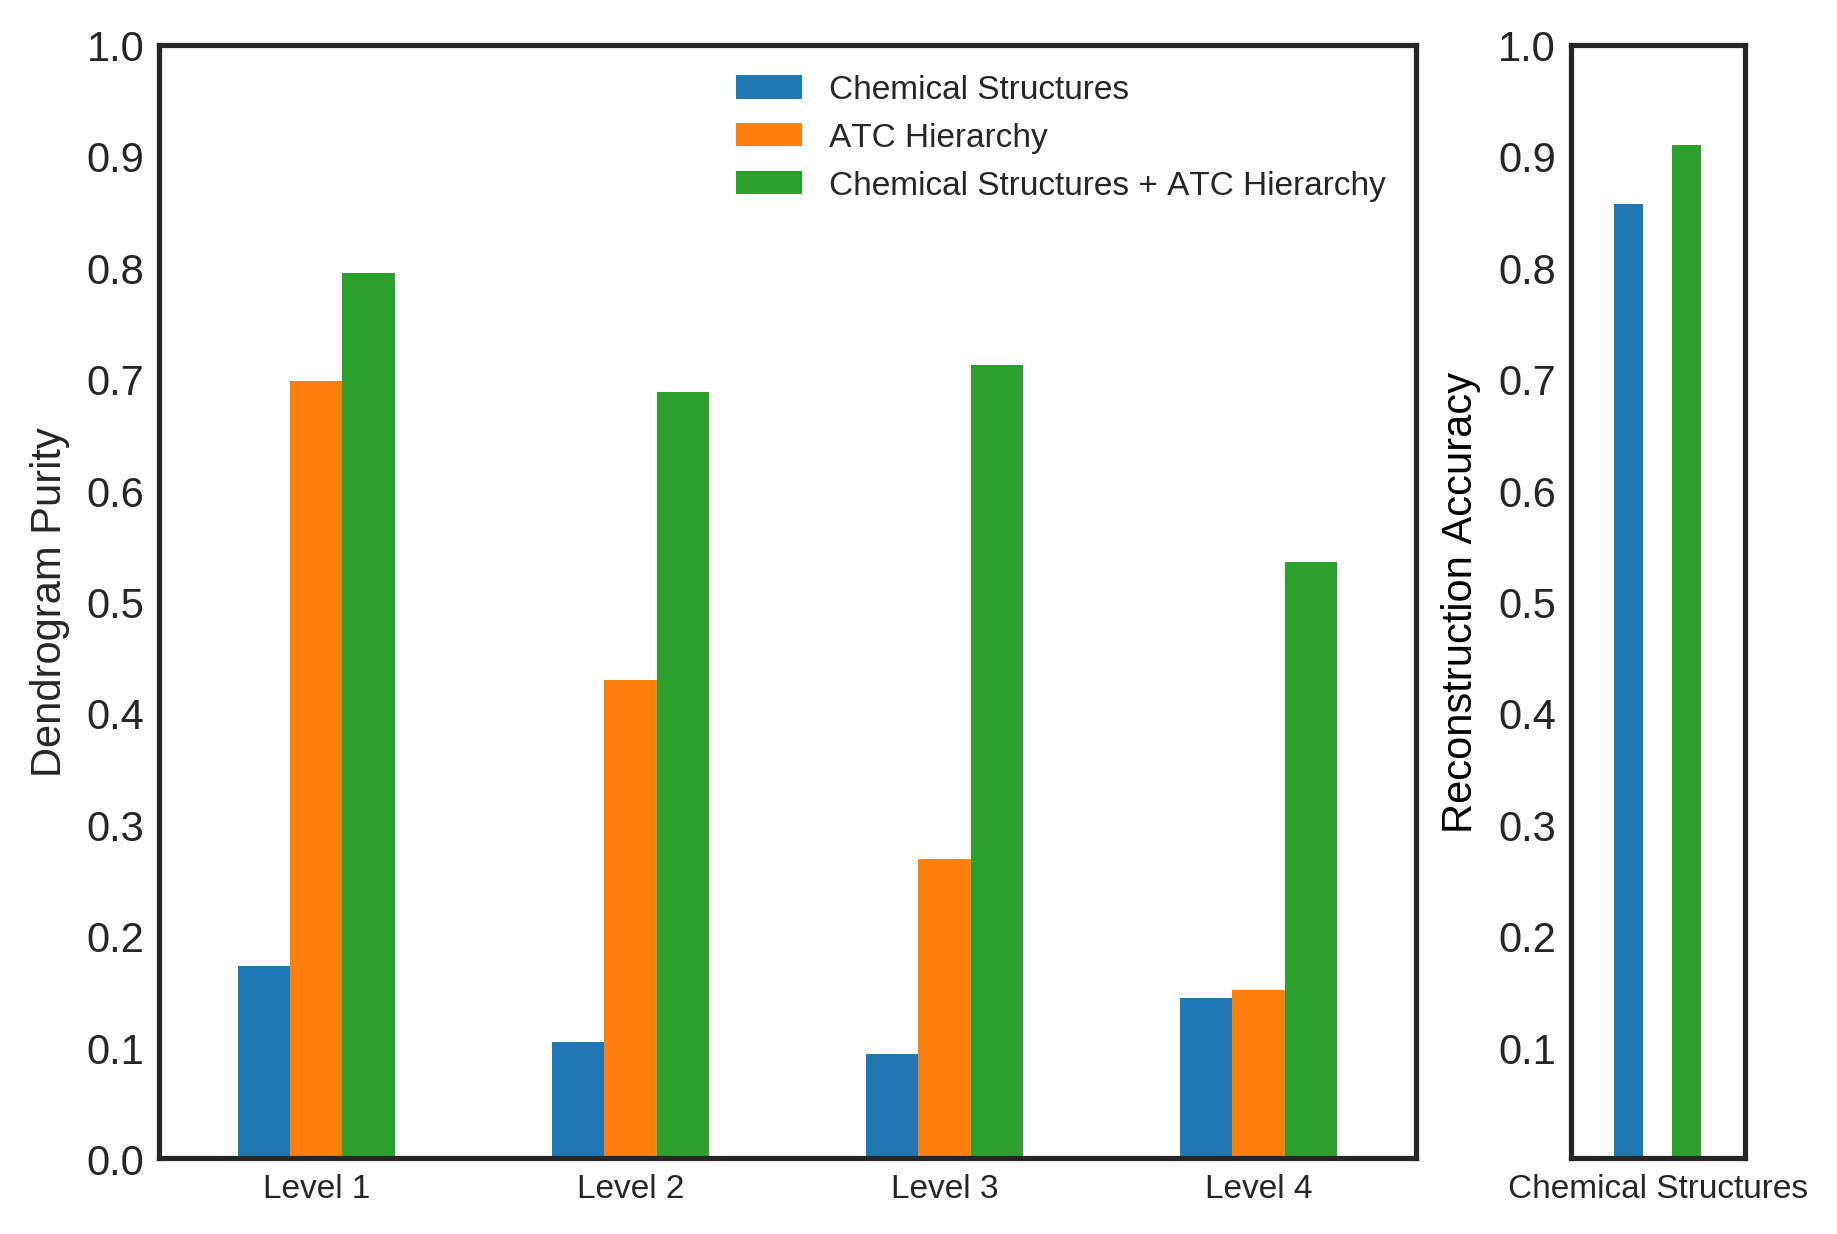

In [12]:
plt.style.use('seaborn-white')
fig3 = plt.figure(constrained_layout=True, dpi=300)
gs = fig3.add_gridspec(80, 50)
f3_ax1 = fig3.add_subplot(gs[:, :40])
df_dp.plot.bar(ax=f3_ax1)
f3_ax1.set_xticklabels(labels=atc_lvl, rotation=0, fontsize=8)
f3_ax1.set_ylabel('Dendrogram Purity', fontsize=10)
f3_ax1.set_yticks(np.arange(0, 1.1, step=0.1))
f3_ax1.legend(['Chemical Structures', 'ATC Hierarchy', 'Chemical Structures + ATC Hierarchy'], fontsize=8)


f3_ax2 = fig3.add_subplot(gs[:, 40:])
df_ra.plot.bar(ax=f3_ax2)
f3_ax2.set_xticklabels(labels=mol_lvl, rotation=0, fontsize=8)
f3_ax2.set_yticks(np.arange(0.1, 1.1, step=0.1))
f3_ax2.set_ylabel('Reconstruction Accuracy', fontsize=10, color='k')  # we already handled the x-label with ax1
f3_ax2.get_legend().remove()
fig3.tight_layout()

plt.show()

# Sampling Strategy

In [18]:
atc_lvl = ['L1 (Anatomical)', 'L2 (Therapeutic)', 'L3 (Pharmacological)', 'L4 (Chemical)']
simple = [0.215, 0.2544, 0.324, 0.6025]
balanced = [0.7951, 0.6876, 0.7126, 0.5352]

df_ss = pd.DataFrame({'simple': simple, 'balanced': balanced}, index = atc_lvl)

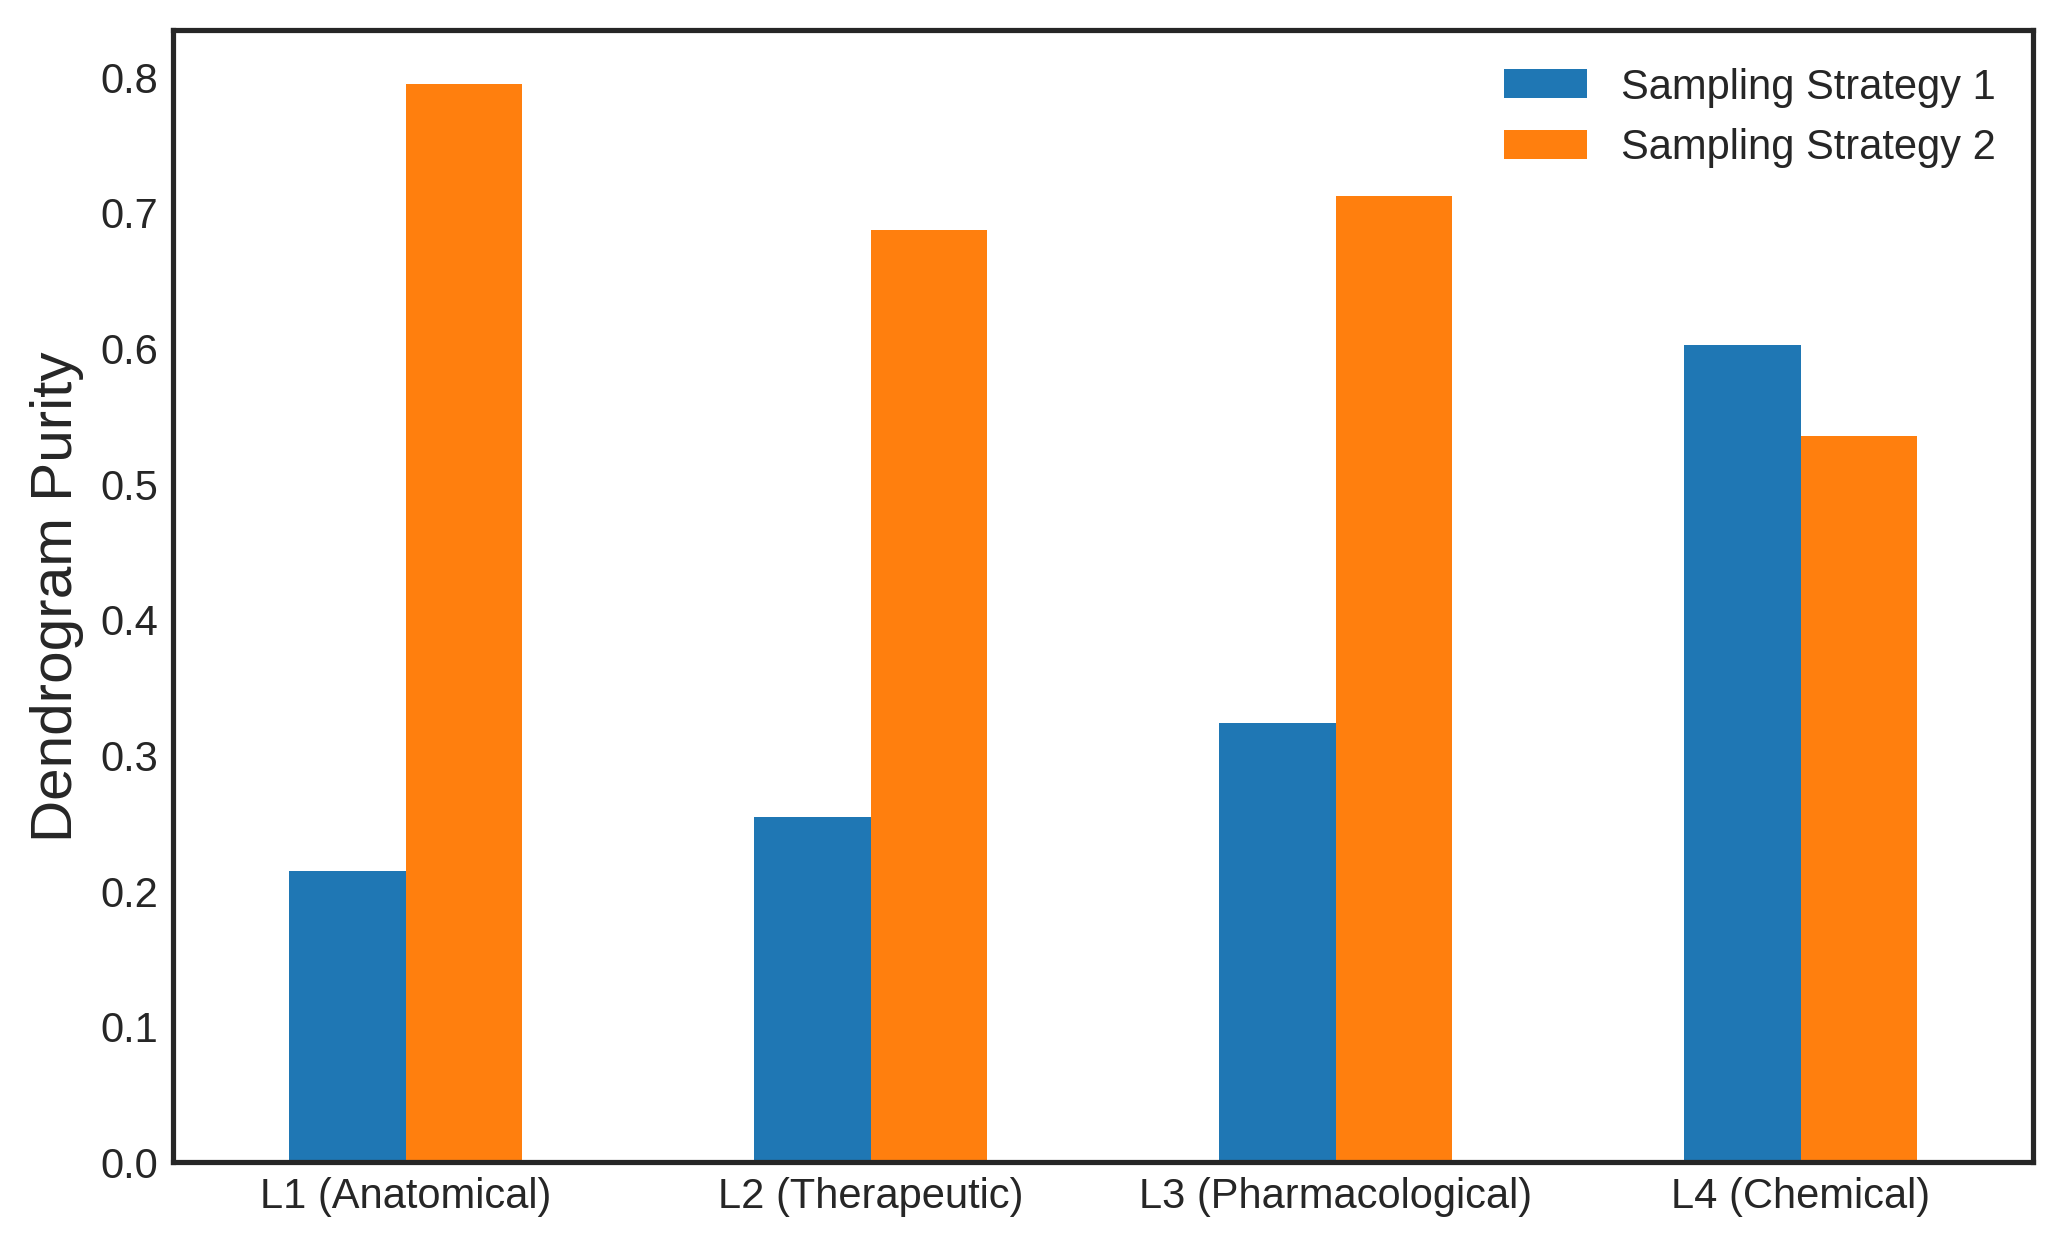

In [19]:
fig2, ax2 = plt.subplots(figsize=(8,5), dpi=300)
plt.style.use('seaborn-white')
plt.grid(False)
df_ss.plot.bar(ax=ax2)
ax2.set_xticklabels(labels=atc_lvl, rotation=0)
ax2.set_ylabel('Dendrogram Purity', fontsize=14)
ax2.legend(['Sampling Strategy 1', 'Sampling Strategy 2'])
ax2.grid(False)
plt.show()

In [13]:
atac_lvl = ['Level 1', 'Level 2', 'Level 3', 'Level 4']
simple = [0.215, 0.2544, 0.324, 0.6025]
balanced = [0.7951, 0.6876, 0.7126, 0.5352]

df_ss = pd.DataFrame({'simple': simple, 'balanced': balanced}, index = atc_lvl)

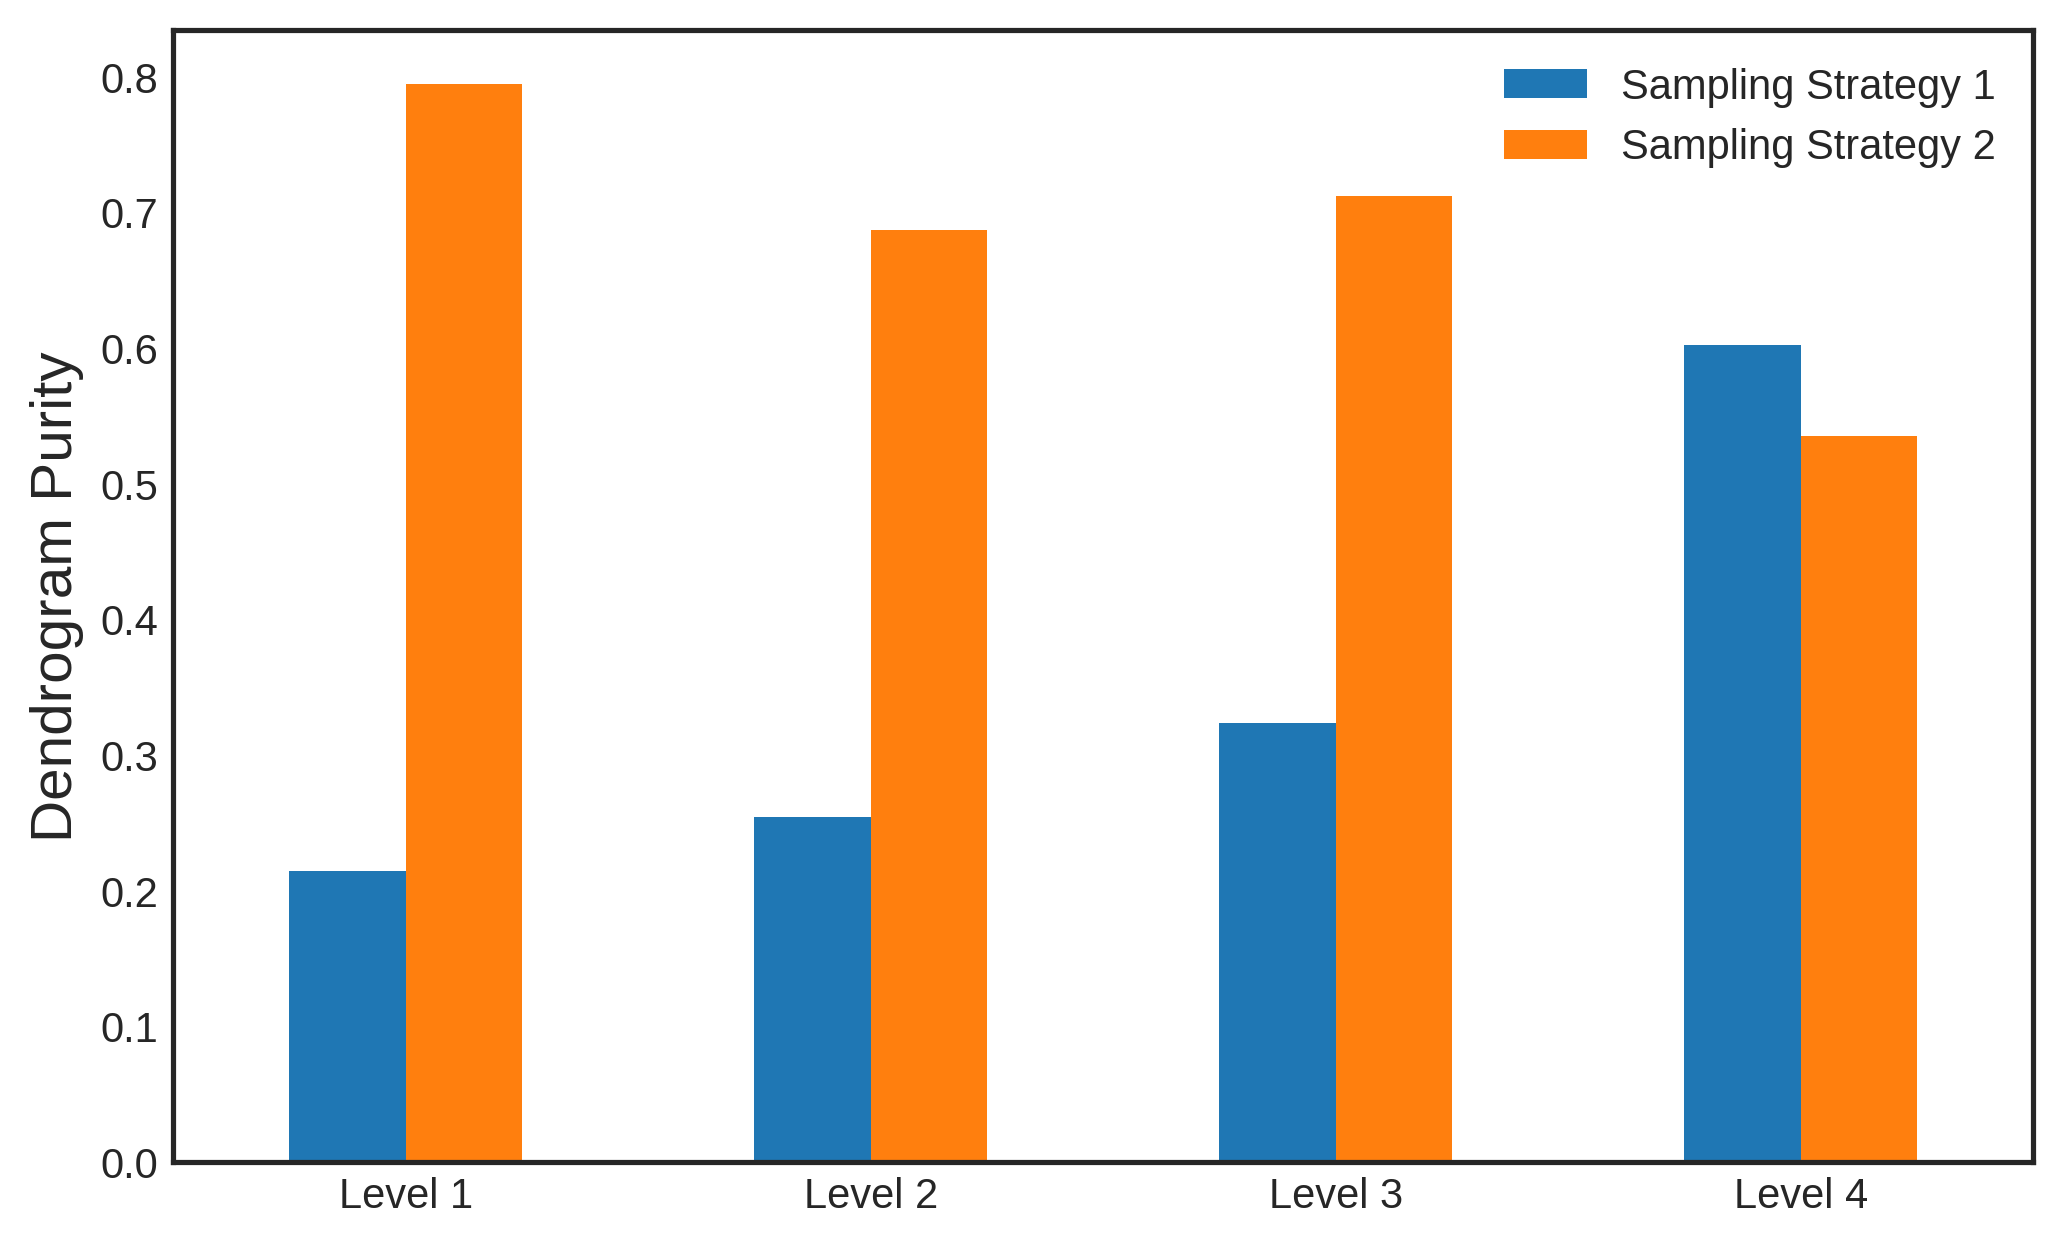

In [14]:
fig2, ax2 = plt.subplots(figsize=(8,5), dpi=300)
plt.style.use('seaborn-white')
plt.grid(False)
df_ss.plot.bar(ax=ax2)
ax2.set_xticklabels(labels=atc_lvl, rotation=0)
ax2.set_ylabel('Dendrogram Purity', fontsize=14)
ax2.legend(['Sampling Strategy 1', 'Sampling Strategy 2'])
ax2.grid(False)
plt.show()

# SIDER

In [8]:
models = ['RF LE', 'KNN LE', 'RF FP', 'NN FP', 'KNN FP', 'GC', 'Weave']
roc_mean = [0.700, 0.676, 0.684, 0.666, 0.628, 0.638, 0.581]
roc_std = [ 0.012, 0.008, 0.009, 0.026, 0.022, 0.012, 0.027]

In [9]:
models = ['LDE+RF', 'FP+RF', 'LDE+KNN', 'FP+KNN', 'GC', 'Weave']
pos = [0, 1, 2.6, 3.6, 5.2,6.2]
roc_mean = [0.700, 0.684, 0.676, 0.628, 0.638, 0.581]
roc_std = [ 0.012, 0.009, 0.008, 0.022, 0.012, 0.027]

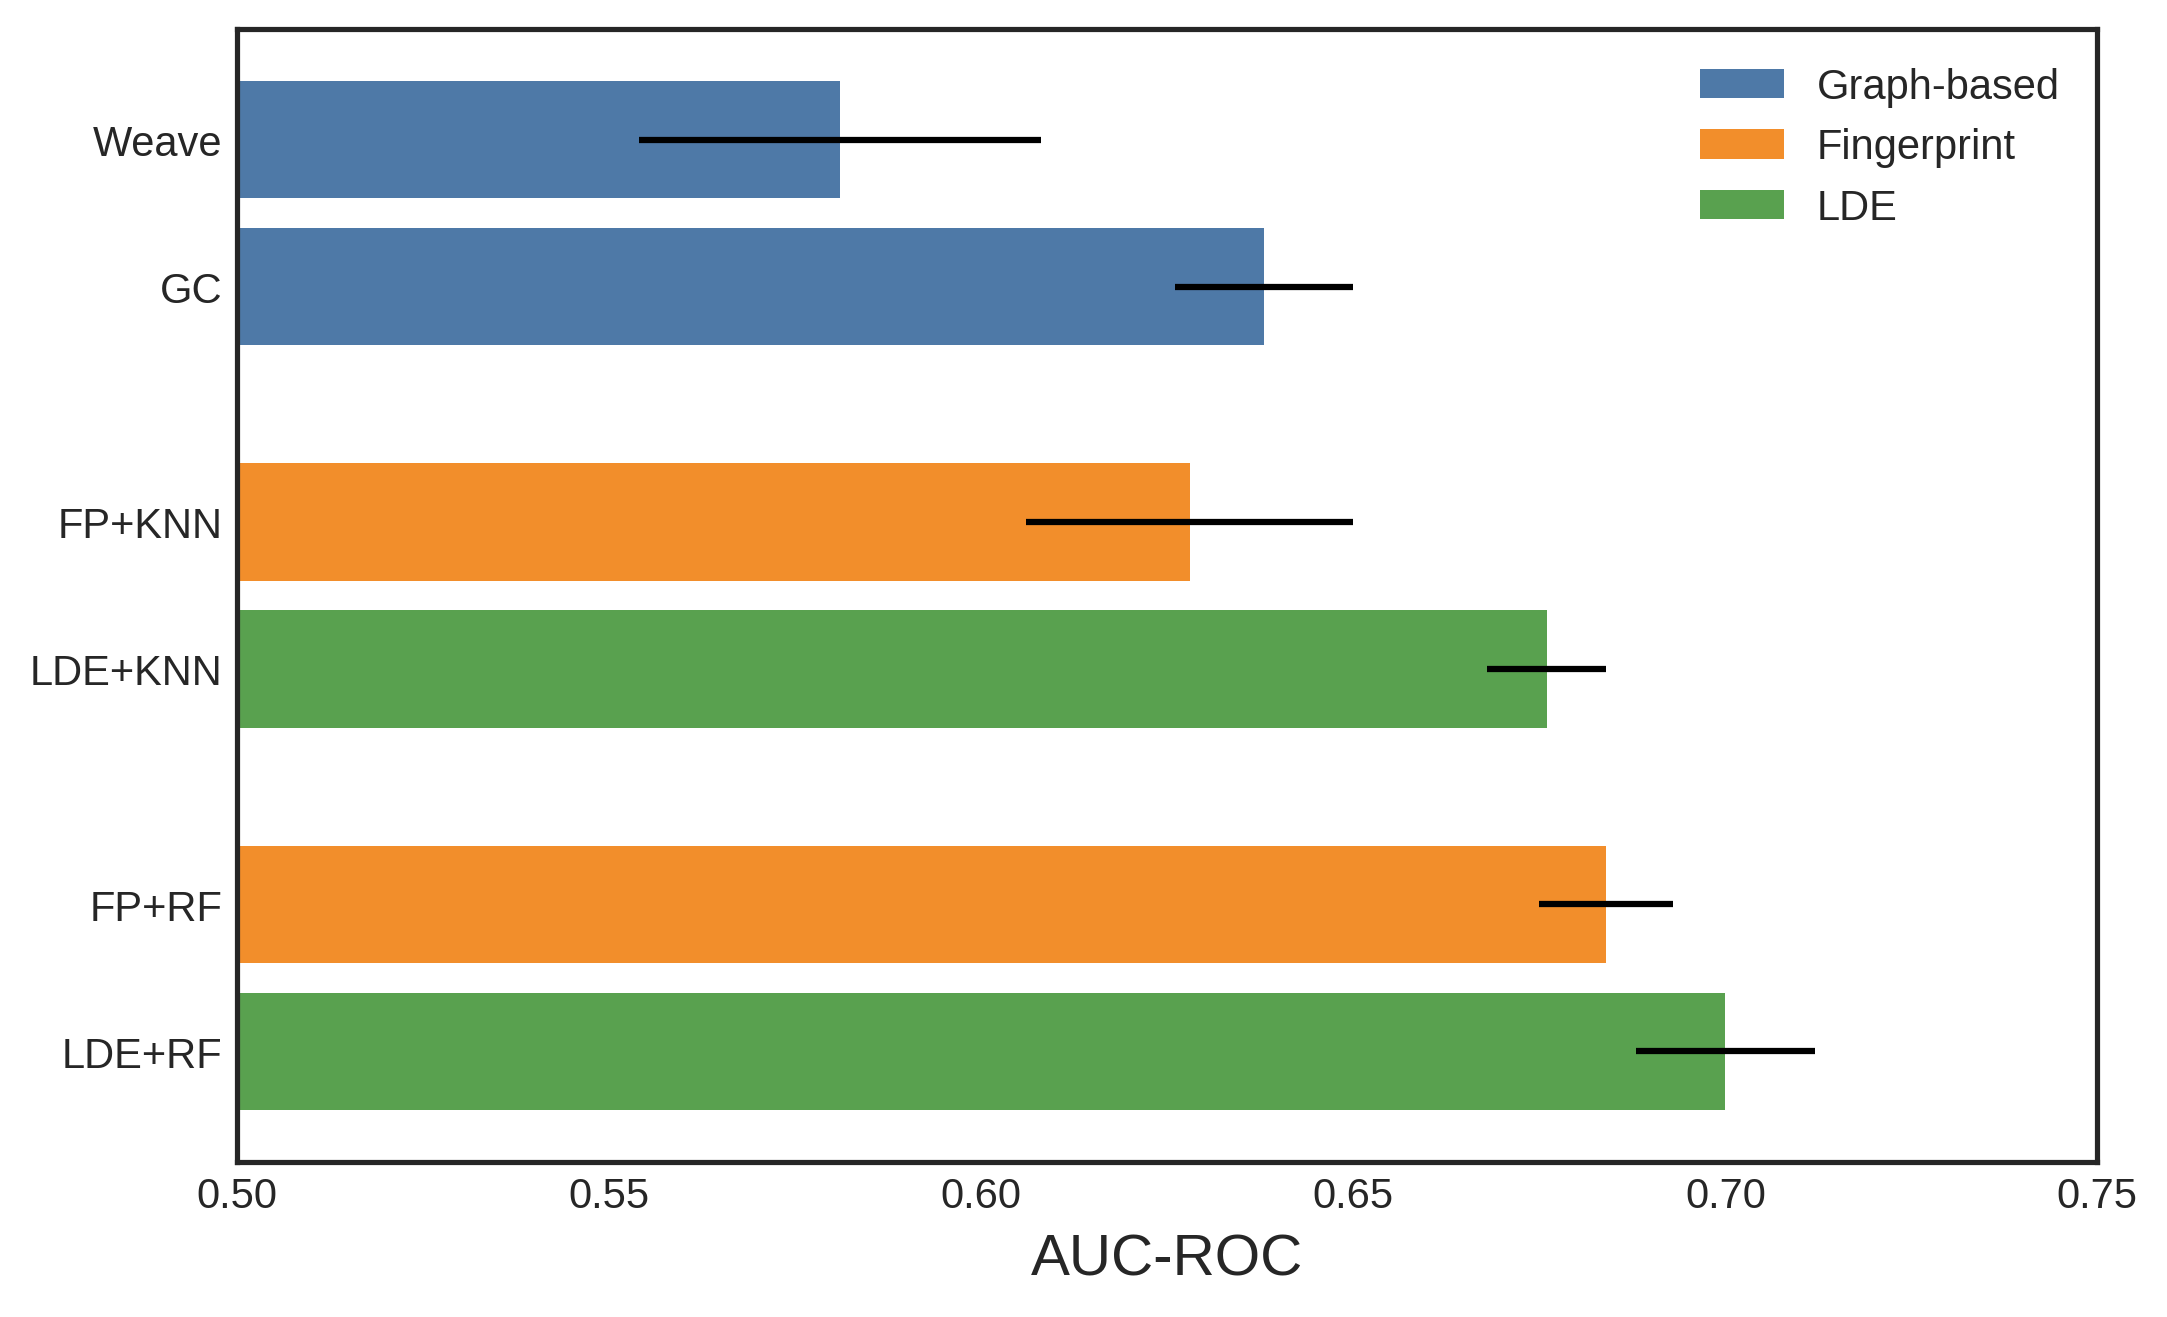

In [11]:
plt.style.use('seaborn-white')
color_lst = ['#59A14F', '#F28E2B', '#59A14F', '#F28E2B', '#4E79A7', '#4E79A7']
plt.figure(figsize=(8,5), dpi=300)

plt.style.use('tableau-colorblind10')
plt.grid(False)

palette = plt.get_cmap('Set2')

#plt.barh(models, roc_mean, xerr=roc_std, color=palette.colors)
#plt.barh(pos, roc_mean, xerr=roc_std, color=color_lst)
bar0 = plt.barh(pos[0], roc_mean[0], xerr=roc_std[0], color=color_lst[0], label='LDE')
bar1 = plt.barh(pos[1], roc_mean[1], xerr=roc_std[1], color=color_lst[1], label='Fingerprint')
bar2 = plt.barh(pos[2], roc_mean[2], xerr=roc_std[2], color=color_lst[2], label='LDE')
bar3 = plt.barh(pos[3], roc_mean[3], xerr=roc_std[3], color=color_lst[3], label='Fingerprint')
bar4 = plt.barh(pos[4], roc_mean[4], xerr=roc_std[4], color=color_lst[4], label='Graph-based')
bar5 = plt.barh(pos[5], roc_mean[5], xerr=roc_std[5], color=color_lst[5], label='Graph-based')
plt.xlim([0.5, 0.75])
plt.yticks(pos, models)
plt.xlabel('AUC-ROC', fontsize=14)
#plt.title('SIDER', fontsize=14)

plt.legend(handles=[bar4, bar1, bar0])

plt.show()

# Vocabulary

In [12]:
from hvae import *
from evae import *
from drugdata import *
from metrics import *
from lorentz import *

In [7]:
exp_dir = './experiments/KDD/kdd_010'
checkpoint = 'checkpoint_epoch110.model'
config_path = os.path.join(exp_dir, 'configs.json')
checkpoint_path = os.path.join(exp_dir, checkpoint)

In [8]:
with open(config_path, 'r') as fp:
    configs = json.load(fp)
fp.close()

In [9]:
# temp
configs['checkpoint'] = checkpoint

In [10]:
configs

{'data_dir': './data/fda_drugs',
 'data_file': 'smiles_set_clean.smi',
 'fda_file': 'all_drugs.smi',
 'vocab_file': 'char_set_clean.pkl',
 'atc_sim_file': 'drugs_sp_all.csv',
 'checkpoint_dir': './experiments/KDD',
 'experiment_name': 'kdd_010',
 'task': 'vae + atc',
 'limit': 0,
 'batch_size': 128,
 'epochs': 100,
 'max_sequence_length': 120,
 'learning_rate': 0.0003,
 'max_norm': 1000000000000.0,
 'wd': 0.0,
 'manifold_type': 'Lorentz',
 'prior_type': 'Standard',
 'num_centroids': 0,
 'bidirectional': False,
 'num_layers': 1,
 'hidden_size': 512,
 'latent_size': 64,
 'word_dropout_rate': 0.2,
 'anneal_function': 'logistic',
 'k': 0.51,
 'x0': 29.0,
 'C': 1.0,
 'num_workers': 4,
 'logging_steps': 1,
 'save_per_epochs': 10,
 'new_training': False,
 'new_annealing': False,
 'checkpoint': 'checkpoint_epoch110.model',
 'trained_epochs': 110,
 'alpha': 0.0,
 'beta': 0.015625,
 'gamma': 0.0,
 'delta': 11.0,
 'nneg': 11,
 'fda_prop': 0.2}

In [13]:
model = load_model(configs)

In [14]:
print(model)

HVAE(
  (encoder_rnn): GRU(49, 512, batch_first=True)
  (decoder_rnn): GRU(49, 512, batch_first=True)
  (hidden2mean): Linear(in_features=512, out_features=64, bias=True)
  (hidden2logv): Linear(in_features=512, out_features=64, bias=True)
  (latent2hidden): Linear(in_features=65, out_features=512, bias=True)
  (outputs2vocab): Linear(in_features=512, out_features=49, bias=True)
  (RECON): NLLLoss()
)


In [15]:
fda_dataset = drugdata(task=configs['task'],
                   fda_drugs_dir=configs['data_dir'],
                   fda_smiles_file=configs['fda_file'],
                   fda_vocab_file=configs['vocab_file'],
                   fda_drugs_sp_file=configs['atc_sim_file'],
                   experiment_dir=os.path.join(configs['checkpoint_dir'], configs['experiment_name']),
                   smi_file=configs['fda_file'],
                   max_sequence_length=configs['max_sequence_length'],
                   nneg=configs['nneg']
                   )

In [16]:
fda_dataset.w2i

{'<pad>': 0,
 '<unk>': 1,
 '<sos>': 2,
 '<eos>': 3,
 '@': 4,
 '+': 5,
 'O': 6,
 'B': 7,
 ']': 8,
 'N': 9,
 'o': 10,
 'Ca': 11,
 'Fe': 12,
 's': 13,
 'Hg': 14,
 'c': 15,
 '4': 16,
 'F': 17,
 'Br': 18,
 'I': 19,
 '#': 20,
 '=': 21,
 '1': 22,
 '-': 23,
 'S': 24,
 'H': 25,
 '\\': 26,
 'P': 27,
 '3': 28,
 'n': 29,
 '/': 30,
 ')': 31,
 'Mg': 32,
 'C': 33,
 '2': 34,
 'Au': 35,
 'Se': 36,
 '5': 37,
 'Bi': 38,
 'Al': 39,
 'Cl': 40,
 'Li': 41,
 '(': 42,
 '7': 43,
 '8': 44,
 'As': 45,
 'Pt': 46,
 '[': 47,
 '6': 48}

# Ablation study on negative samples K

In [16]:
#K_lst = ['3','5','7','9','11','13']
K_lst = [3,5,7,9,11,13]
atc_lvl1 = [0.7855,0.7830,0.7892, 0.7798, 0.795, 0.7984]
atc_lvl2 = [0.5665, 0.6686, 0.6620, 0.6579, 0.690, 0.6807]
atc_lvl3 = [0.4895, 0.5721, 0.6407, 0.6108, 0.714, 0.7065]
atc_lvl4 = [0.3730, 0.4258, 0.4793, 0.4772, 0.528, 0.5338]

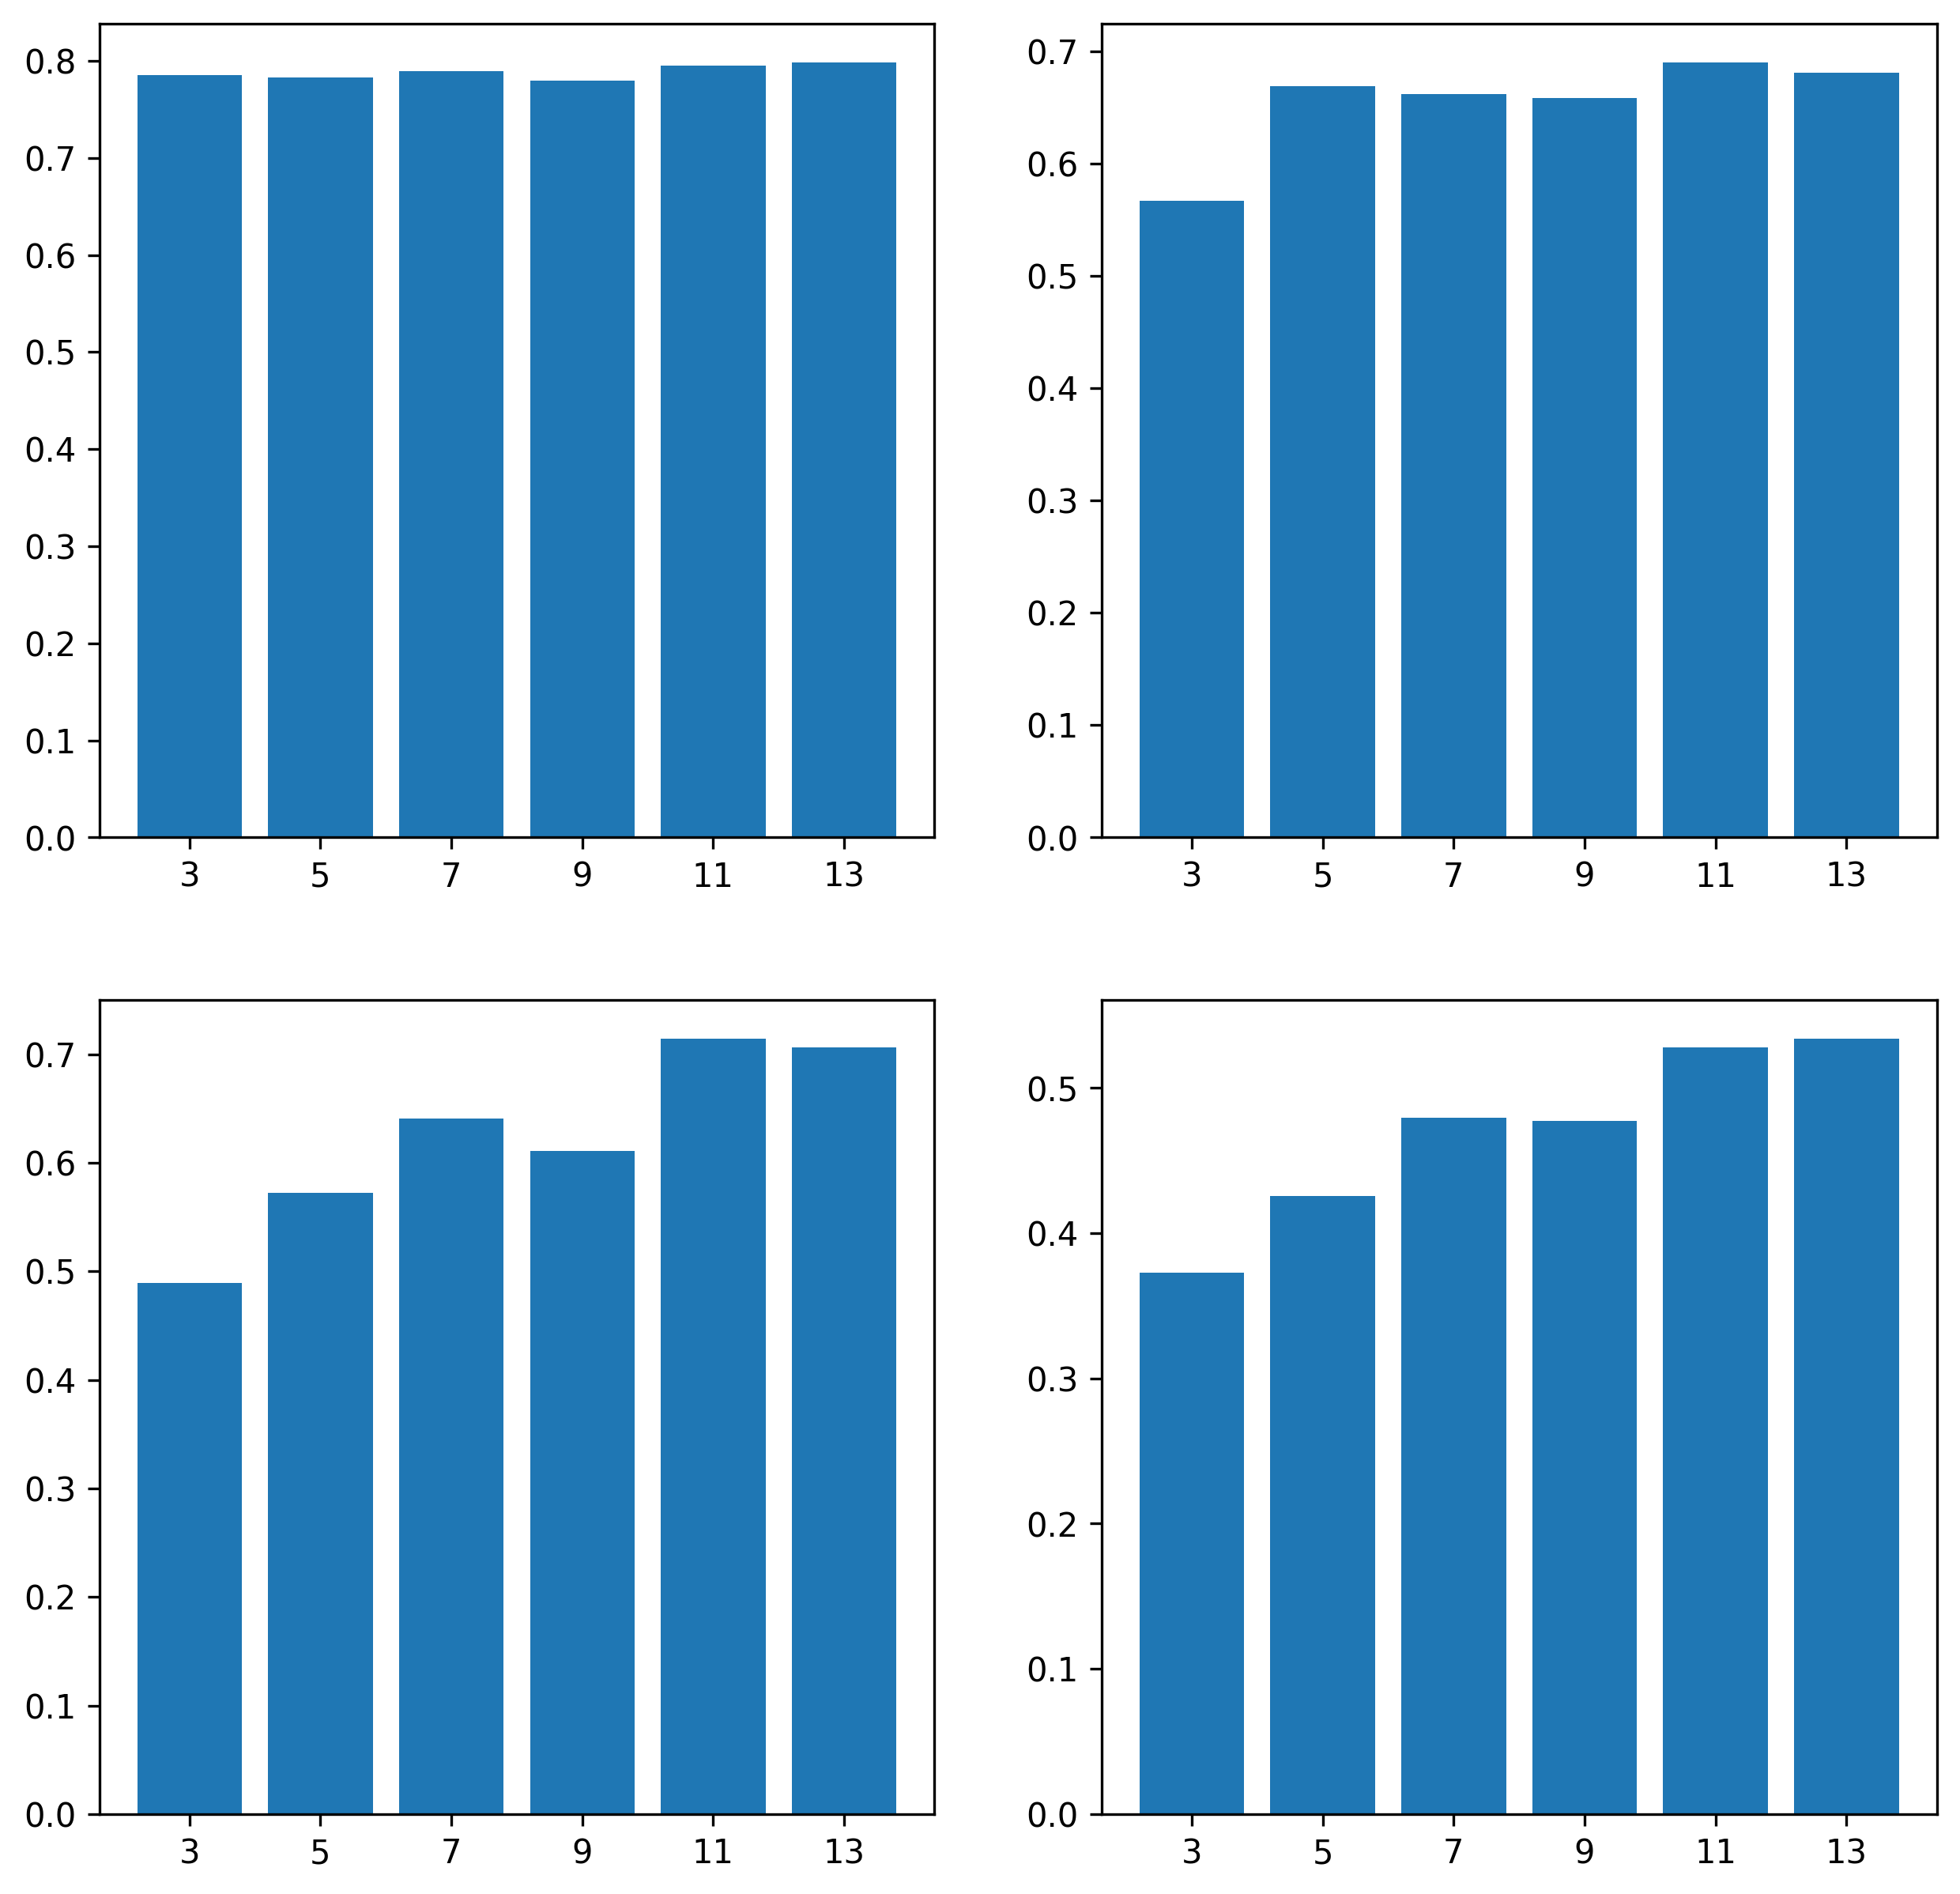

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10), dpi=300)

ax1 = axes[0,0]
scatter1 = ax1.bar(K_lst, atc_lvl1)
ax1.set_xticklabels(labels=K_lst, rotation=0)
ax1.set_xlabel = ('K')

ax2 = axes[0,1]
scatter2 = ax2.bar(K_lst, atc_lvl2)
ax2.set_xticklabels(labels=K_lst, rotation=0)
ax2.set_xlabel = ('K')

ax3 = axes[1,0]
scatter3 = ax3.bar(K_lst, atc_lvl3)
ax3.set_xticklabels(labels=K_lst, rotation=0)
ax3.set_xlabel = ('K')

ax4 = axes[1,1]
scatter4 = ax4.bar(K_lst, atc_lvl4)
ax4.set_xticklabels(labels=K_lst, rotation=0)
ax4.set_xlabel = ('K')

plt.show()

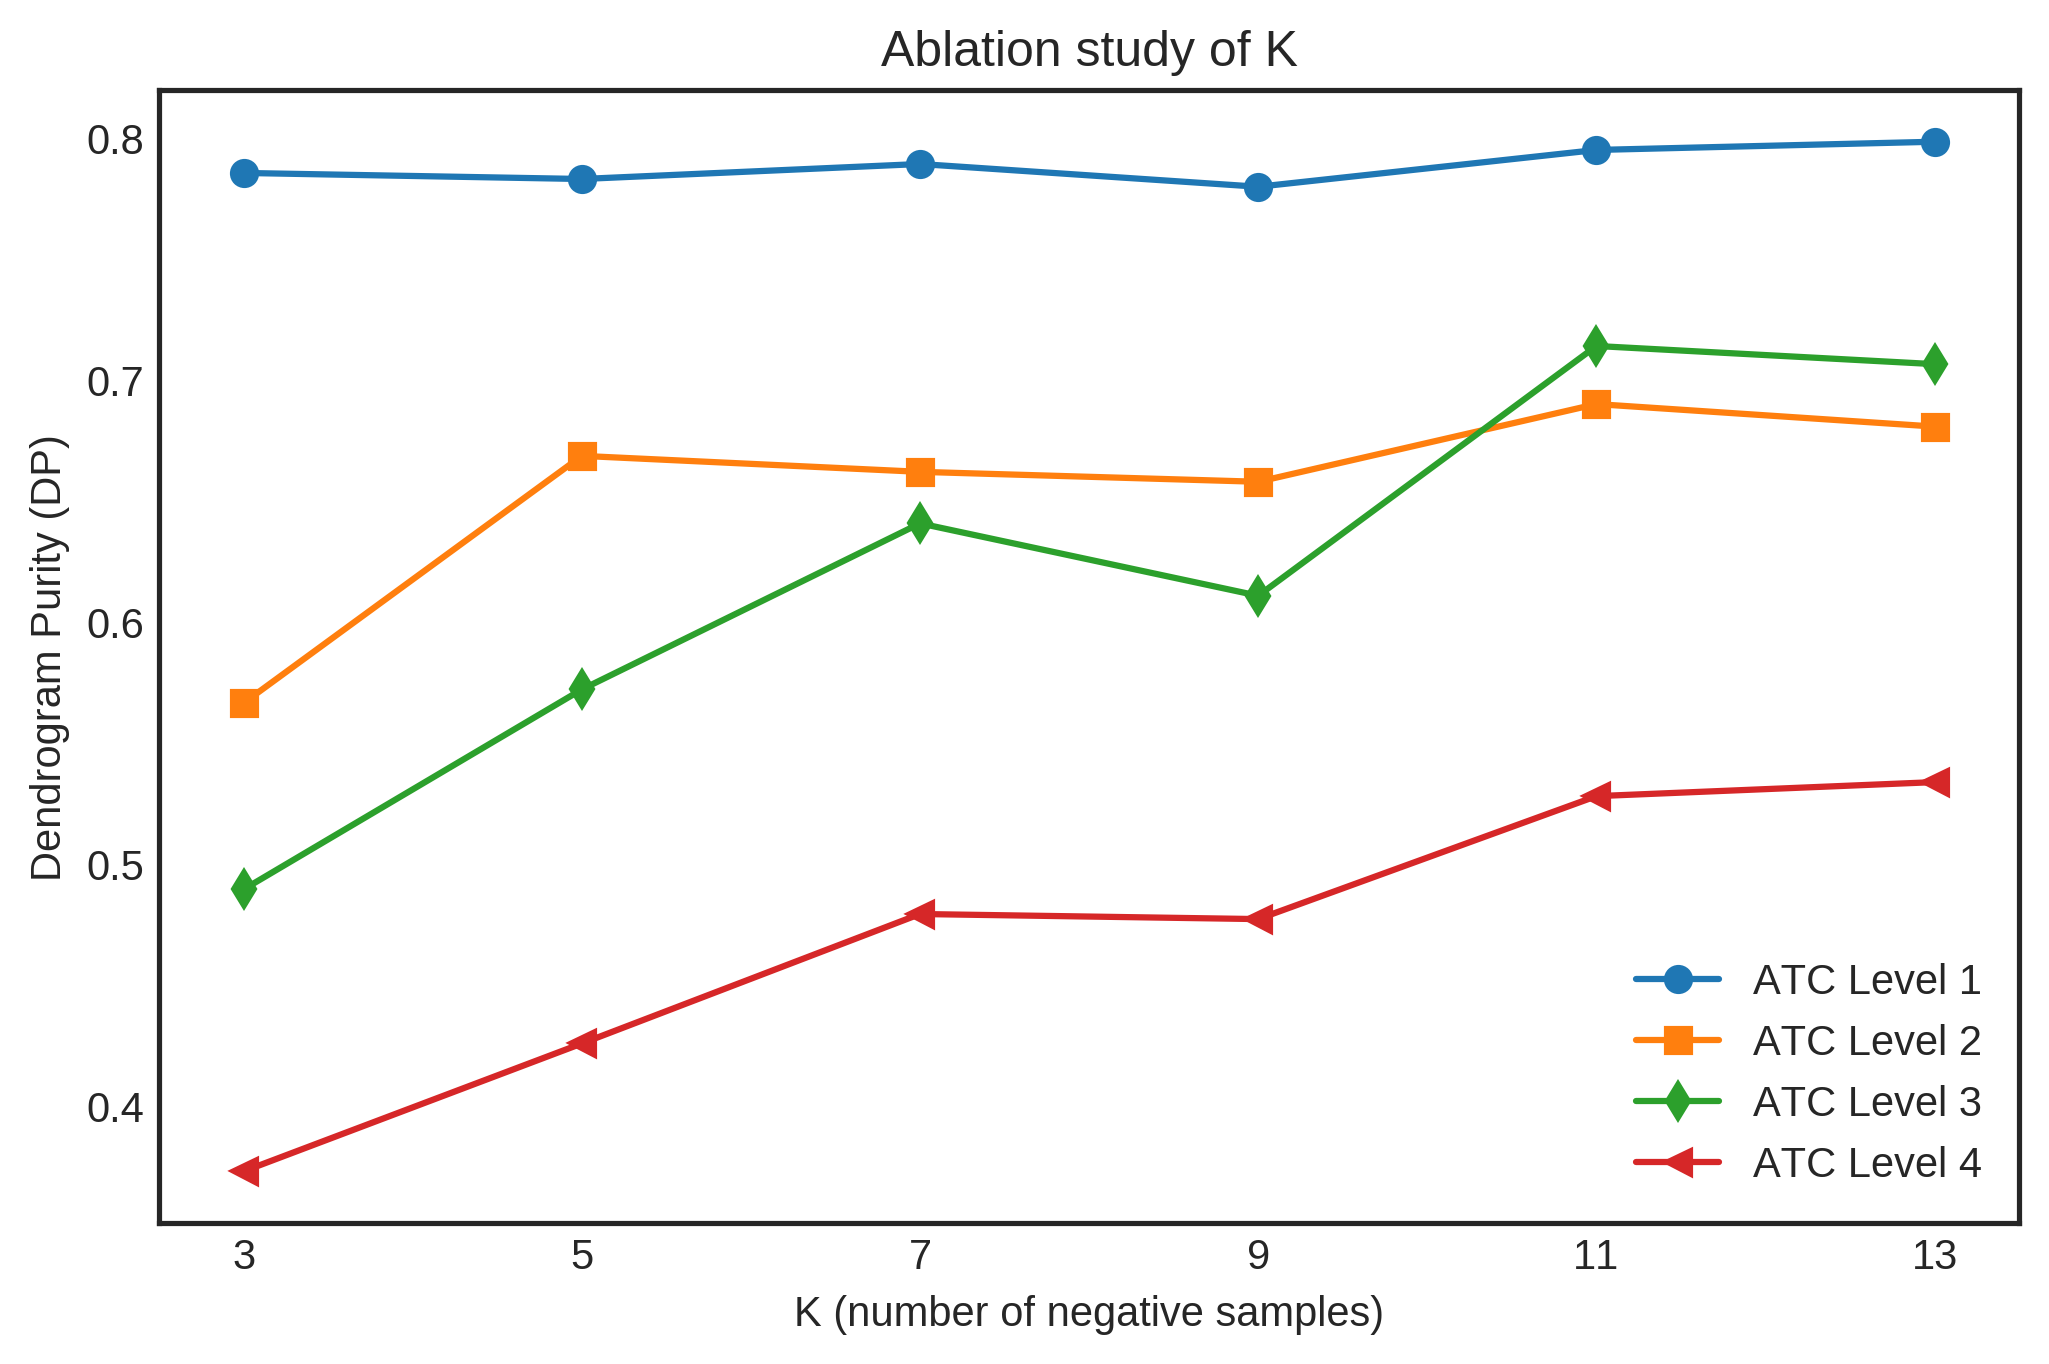

In [17]:
from matplotlib.pyplot import figure
figure(figsize=(8, 5), dpi=300)

plt.plot(K_lst, atc_lvl1,'o-', label='ATC Level 1')
plt.plot(K_lst, atc_lvl2,'s-', label='ATC Level 2')
plt.plot(K_lst, atc_lvl3,'d-', label='ATC Level 3')
plt.plot(K_lst, atc_lvl4,'<-', label='ATC Level 4')
plt.xticks([3,5,7,9,11,13])
plt.xlabel('K (number of negative samples)')
plt.ylabel('Dendrogram Purity (DP)')
plt.title('Ablation study of K')
plt.legend()
plt.show()